# **1. Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

In [2]:
df=pd.read_csv("beverage_cluster.csv")
df.head()

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price,cluster
0,B2B,1.66,53,0.10,79.18,5
1,B2B,1.56,90,0.10,126.36,5
2,B2B,1.17,73,0.05,81.14,5
3,B2B,3.22,59,0.10,170.98,5
4,B2B,0.87,35,0.10,27.40,1


# **3. Data Splitting**

In [3]:
le=LabelEncoder()
df["Customer_Type"]=le.fit_transform(df["Customer_Type"])
df["Customer_Type"].unique()
df

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price,cluster
0,0,1.66,53,0.10,79.18,5
1,0,1.56,90,0.10,126.36,5
2,0,1.17,73,0.05,81.14,5
3,0,3.22,59,0.10,170.98,5
4,0,0.87,35,0.10,27.40,1
...,...,...,...,...,...,...
19995,1,3.02,4,0.00,12.08,0
19996,1,57.11,6,0.00,342.66,4
19997,1,0.93,3,0.00,2.79,0
19998,1,1.46,4,0.00,5.84,0


In [4]:
X=df.drop(columns=['cluster'])
y=df['cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# menghitung panjang/jumlah data 
print("Jumlah data: ",len(X))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data latih: ",len(X_train))
# menghitung panjang/jumlah data pada x_test
print("Jumlah data test: ",len(X_test))

Jumlah data:  20000
Jumlah data latih:  16000
Jumlah data test:  4000


# **4. Membangun Model Klasifikasi**

## **a. Membangun Model Klasifikasi**

In [5]:
rf_model=RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [6]:
svm_model=SVC(random_state=42)
svm_model.fit(X_train,y_train)

SVC(random_state=42)

## **b. Evaluasi Model Klasifikasi**

In [7]:
rf_preds = rf_model.predict(X_test)
print("evaluasi hasil dari Random Forest klasifikasi")
print("Accuracy score:",round(accuracy_score(y_test,rf_preds)*100,2),"%")
print("Precision score:",precision_score(y_test,rf_preds,average="macro"))
print("Recall score:",recall_score(y_test,rf_preds,average="macro"))
print("F1 score:",f1_score(y_test,rf_preds,average="macro"))

evaluasi hasil dari Random Forest klasifikasi
Accuracy score: 99.83 %
Precision score: 0.9977221347306273
Recall score: 0.9950455463063597
F1 score: 0.996369069981454


In [8]:
svm_preds = svm_model.predict(X_test)
print("evaluasi hasil dari support vector mechinne")
print("Accuracy score:",round(accuracy_score(y_test,svm_preds)*100,2),"%")
print("Precision score:",precision_score(y_test,svm_preds,average="macro"))
print("Recall score:",recall_score(y_test,svm_preds,average="macro"))
print("F1 score:",f1_score(y_test,svm_preds,average="macro"))

evaluasi hasil dari support vector mechinne
Accuracy score: 87.67 %
Precision score: 0.9223014977050263
Recall score: 0.8888074558270036
F1 score: 0.8953184484004539


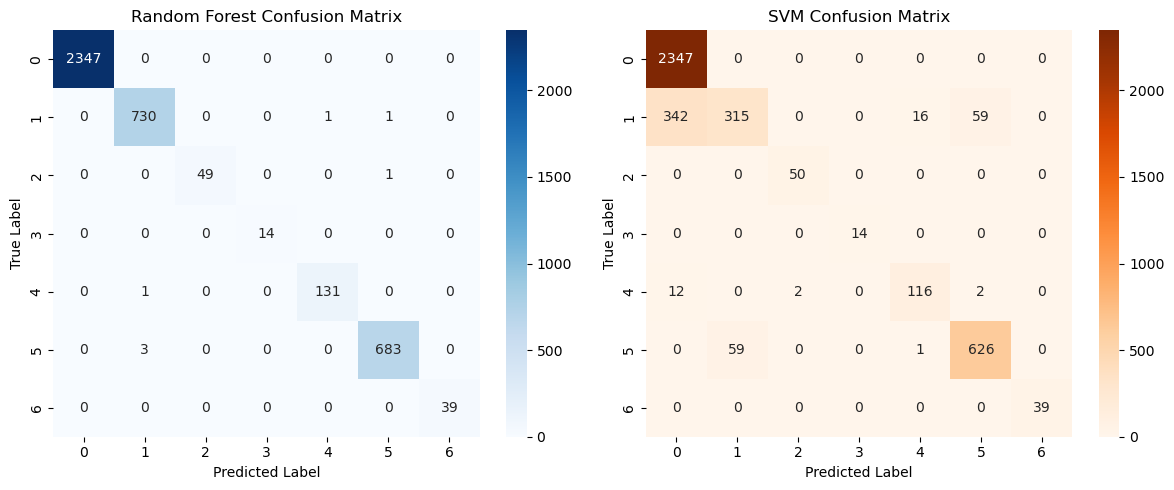

In [9]:
# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
svm_cm = confusion_matrix(y_test, svm_preds)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")

sns.heatmap(svm_cm, annot=True, fmt="d", cmap="Oranges", ax=axes[1])
axes[1].set_title("SVM Confusion Matrix")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

plt.tight_layout()
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

In [10]:
# Definisi parameter search space untuk Random Forest
param_rf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Definisi dan mengunakan tunning RandomizedSearchCV untuk Random Forest
rf = RandomForestClassifier(random_state=42)
random_rf = RandomizedSearchCV(rf, param_rf, cv=3, n_jobs=-1, verbose=1, n_iter=10, random_state=42)
random_rf.fit(X_train, y_train)
print("Best params for Random Forest:", random_rf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best params for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**


Evaluasi Setelah Tuning:
Best Params: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Accuracy: 0.9985
Precision: 0.9985
Recall: 0.9985
F1 Score: 0.9985


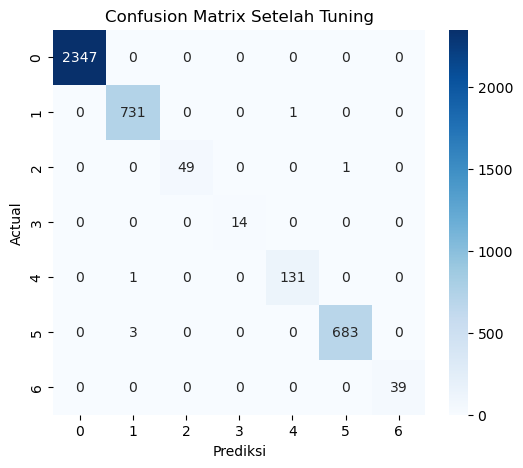

In [11]:
# Model terbaik setelah tuning
best_rf = random_rf.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

# Evaluasi setelah tuning
print("\nEvaluasi Setelah Tuning:")
print(f"Best Params: {random_rf.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_tuned, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_tuned, average='weighted'):.4f}")

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Prediksi')
plt.ylabel('Actual')
plt.title('Confusion Matrix Setelah Tuning')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Evaluasi Model Sebelum dan Setelah Hyperparameter Tuning**

#### **Perbandingan Hasil Evaluasi**
Berdasarkan hasil evaluasi model **RandomForest classifier sebelum dan setelah tuning**, dapat disimpulkan bahwa **tidak ada perubahan signifikan**. Berikut adalah perbandingan utama:

| **Metrik**       | **Sebelum Tuning** | **Setelah Tuning** |
|------------------|------------------|------------------|
| **Accuracy**     | 0.9983              | 0.9985              |
| **Precision** | 0.9977       |  0.9985       |
| **Recall**    | 0.9950       |  0.9985       |
| **F1-Score**  | 0.9963       | 0.9985       |


Dari tabel tersebut, **tuning tidak memberikan peningkatan performa yang signifikan** karena model sudah mencapai tingkat akurasi yang sangat tinggi sebelumnya.
**Random Forest mengalami sedikit peningkatan akurasi setelah tuning**, menunjukkan bahwa model sudah cukup optimal sebelumnya.

####  **Identifikasi Kelemahan Model**

##### **ada data yang memiliki kesalahan kelas**
- pada model SVM dapat dilihat pada **matrix confusionnya** bisa dicek ada kelas yang memiliki banyak kesalahan prediksi.
- Jika model salah dalam mengklasifikasikan kelas tertentu, bisa jadi model harus dilakukan **balancing data atau feature engineering**.

##### **Apakah model mengalami overfitting atau underfitting?**
- Dari hasil sebelumnya, **Random Forest memiliki akurasi tinggi di testing**, berarti **tidak mengalami overfitting**.

#### Rekomendasi Tindakan Lanjutan
##### Jika **Precision atau Recall** rendah:
- menggunakan **SMOTE** jika data tidak seimbang.
- ganti model lain seperti **XGBoost atau DecisionTree** atau model ML lain yang belum digunakan.

#### Kesimpulan
- **Random Forest memiliki performa yang sangat baik**, dengan akurasi yang sangat tinggi hampir 100%.
- **SVM memiliki performa yang mirip Random Forest**, tetapi accuracy masih sedikit dibawah **Random Forest**.